# Exploratory Data Analysis: A Case study of Financial Inclusion in the Years 2016 - 2018 in Kenya, Rwanda, Tanzania, and Uganda.

### a) Specifying the Data Analytic Question

> The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.

### b) Defining the Metric for Success

>The main aim is to explore our data and provide substantial analysis of how many people in the specified countries are most likely to own a bank account providing key insights on various aspects that affect account ownership.

### c) Understanding the context 
>Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account. Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design
> We will be conducting Exploratory data analysis, Univariate analysis, Bivariate and multivariate analysis steps to  get the relationships and differences between different variables hence coming up with a prediction on individuals who are most likely to have a bank account.

### e) Data Relevance
>The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.

## Step 1 : Reading the Data

In [114]:
# Importing all important libraries in context to our research.
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import researchpy as rp


In [115]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = "http://bit.ly/FinancialDataset"

finance = pd.read_csv("http://bit.ly/FinancialDataset")
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## Step 2 : Checking the data

In [116]:
# Determining the no. of records in our dataset
finance.shape

(23524, 13)

In [117]:
# Previewing the bottom of our dataset
finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [118]:
# Checking whether each column has an appropriate datatype
finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [119]:
# Checking our columns

finance.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [120]:
#Dropping unncecessary columns. 
columns = ['uniqueid','The relathip with head' ]
finance = finance.drop(columns, axis=1)

In [121]:
#cleaning data using strip(),lower(), replace()
finance.columns = finance.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [122]:
#Renaming the columns

finance.rename(columns={'level_of_educuation':'level_of_education'}, inplace = True)
finance.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'marital_status', 'level_of_education',
       'type_of_job'],
      dtype='object')

In [123]:
#Check for missing data
finance.isnull().sum()

country                 14
year                     0
has_a_bank_account      36
type_of_location        15
cell_phone_access       11
household_size          28
respondent_age          34
gender_of_respondent    34
marital_status          32
level_of_education      29
type_of_job             30
dtype: int64

In [124]:
#Dropping missing values
finance =finance.dropna()

In [125]:
#Confirm null values were dropped
finance.isnull().sum()

country                 0
year                    0
has_a_bank_account      0
type_of_location        0
cell_phone_access       0
household_size          0
respondent_age          0
gender_of_respondent    0
marital_status          0
level_of_education      0
type_of_job             0
dtype: int64

In [126]:
# Checking final number of records left
finance.shape


(23343, 11)

## Step 3 : Tidying the Data

<AxesSubplot:xlabel='year'>

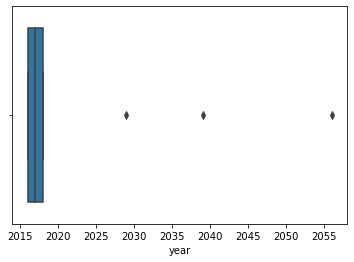

In [127]:
# Checking for Outliers
#

# In the column year since we need to see 2016 - 2018
sns.boxplot(x=finance['year'])

<AxesSubplot:xlabel='respondent_age'>

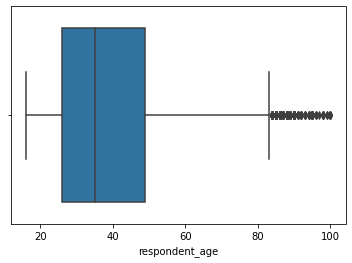

In [128]:
#Checking for outliers in the column age
sns.boxplot(x=finance['respondent_age'])
#There are a number of outliers for ages between 80 to 100

<AxesSubplot:xlabel='household_size'>

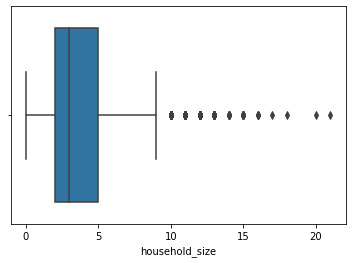

In [129]:
# Check if there are outliers for numeric columns
sns.boxplot(x=finance['household_size'])



In [130]:
# We take care of the outliers/anomalies using the interquatile ranges formula to have 
# a more sensible data set.

Q1 = finance.quantile(0.25)
Q3 = finance.quantile(0.75)
IQR = Q3 - Q1

finance = finance[~((finance < (Q1 - 1.5 * IQR)) |(finance > (Q3 + 1.5 * IQR))).any(axis=1)]

In [131]:
# Checking if a substantial amount of data remained
# The records left are a good number.
finance.shape

(22725, 11)

In [132]:
#Converting datatypes

finance['country'] = finance['country'].astype('category')
finance['has_a_bank_account'] = finance['has_a_bank_account'].astype('category')
finance['type_of_location'] = finance['type_of_location'].astype('category')
finance['gender_of_respondent'] = finance['gender_of_respondent'].astype('category')
finance['level_of_education'] = finance['level_of_education'].astype('category')
finance['year']= pd.to_datetime(finance['year']) 
finance['type_of_job'] = finance['type_of_job'].astype('category')
finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   country               22725 non-null  category      
 1   year                  22725 non-null  datetime64[ns]
 2   has_a_bank_account    22725 non-null  category      
 3   type_of_location      22725 non-null  category      
 4   cell_phone_access     22725 non-null  object        
 5   household_size        22725 non-null  float64       
 6   respondent_age        22725 non-null  float64       
 7   gender_of_respondent  22725 non-null  category      
 8   marital_status        22725 non-null  object        
 9   level_of_education    22725 non-null  category      
 10  type_of_job           22725 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(2), object(2)
memory usage: 1.2+ MB


## Step 4 : Exploratory analysis

> Univariate Analysis

In [133]:
# Creating our frequency table using value counts
# ---
finance.has_a_bank_account.value_counts()

No     19490
Yes     3235
Name: has_a_bank_account, dtype: int64

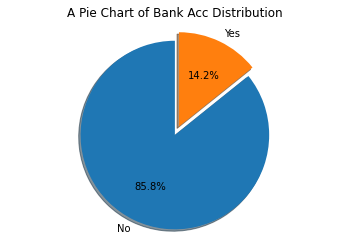

In [134]:
#Create a pie chart to indicate the has_a_bank_account column
column= finance.has_a_bank_account.value_counts()


# accessing the data to plot

# labels
label= ['No','Yes']
# values
value = column.values

# plotting the pie chart
plt.pie(value, labels = label, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of Bank Acc Distribution')
plt.show()

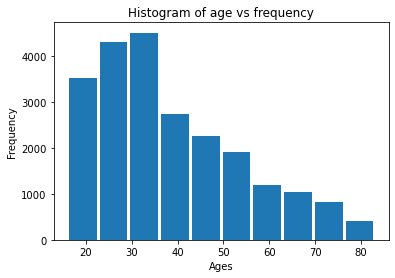

In [135]:
#Plotting a age histogram
ages = finance['respondent_age']

plt.hist(ages, histtype='bar', rwidth=0.9)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Histogram of age vs frequency')
plt.show()

**Measures of Central Tendency**

In [136]:
# Finding the mean Age
finance["respondent_age"].mean()

38.34798679867987

In [137]:
# Finding the median
finance["respondent_age"].median()

35.0

In [138]:
# Finding the median
finance["respondent_age"].mode()

0    30.0
dtype: float64

In [139]:
#Calculate quantiles
quantile_age = finance["respondent_age"].quantile([0.25,0.5,0.75])
print(quantile_age)

0.25    26.0
0.50    35.0
0.75    48.0
Name: respondent_age, dtype: float64


In [140]:
#Calculating measures of dispersion


st_dev = finance.respondent_age.std()
print('Standard Deviation:' ,st_dev)
var = finance.respondent_age.var()
print('Variance:', var)
skew = finance.respondent_age.skew()
print('Skewness:', skew)
kurt = finance.respondent_age.kurtosis()
print('Kurtosis:',kurt)



# Kurtosis is less than zero, then the distribution is light tails and is called a platykurtic distribution. 
# This is a moderately skewed distrubution


Standard Deviation: 15.806141256107674
Variance: 249.83410140802906
Skewness: 0.7402138281724044
Kurtosis: -0.23749387799691757


## Bivariate Analysis with Python 

In [141]:
# Calculating the pearson coefficient
pearson_coeff = finance["household_size"].corr(finance["respondent_age"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = finance["household_size"].corr(finance["respondent_age"]) 
print(coeff)

# A value near to 0 (negative) indicates the absence of any correlation between the two variables, and hence those variables are independent of each other.

-0.10620882169759868
-0.10620882169759868


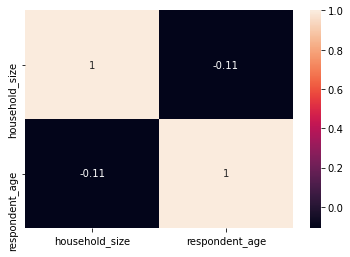

In [142]:
sns.heatmap(finance.corr(),annot=True)
plt.show()

gender_of_respondent  has_a_bank_account
Female                No                    0.891543
                      Yes                   0.108457
Male                  No                    0.808962
                      Yes                   0.191038
Name: has_a_bank_account, dtype: float64


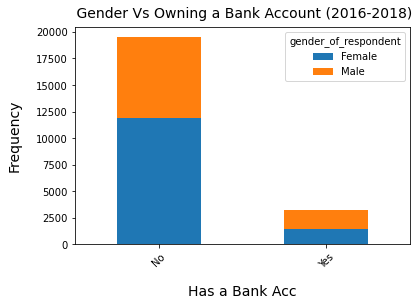

In [143]:
# Checking which gender is most Likely to own a Bank Account
finance.groupby('gender_of_respondent')['has_a_bank_account'].value_counts().unstack(level=0).plot(kind='bar', stacked='True').plot(kind='bar', stacked='True')

labels = finance.groupby('gender_of_respondent')['has_a_bank_account'].value_counts(normalize=True)
print(labels)
# # Rotating our x axis ticks
plt.xticks(rotation = 45)

# # Giving our chart a title
plt.title(" Gender Vs Owning a Bank Account (2016-2018)", fontsize=14, y=1.015)

# # Labeling our y axis
plt.ylabel("Frequency", fontsize=14, labelpad=15)

# # Labeling our x axis
plt.xlabel("Has a Bank Acc", fontsize=14, labelpad=15)

# # Displaying our chart
plt.show()

type_of_location  has_a_bank_account
Rural             No                    0.883056
                  Yes                   0.116944
Urban             No                    0.818284
                  Yes                   0.181716
Name: has_a_bank_account, dtype: float64


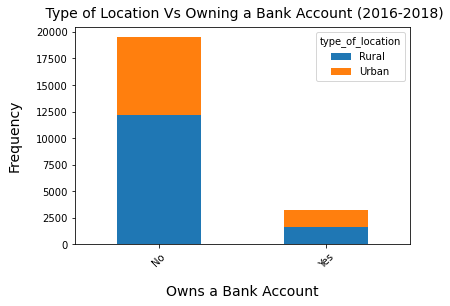

In [144]:
# Checking how location affects owning a Bank Account
finance.groupby('type_of_location')['has_a_bank_account'].value_counts().unstack(level=0).plot(kind='bar', stacked='True')
# # Rotating our x axis ticks
labels = finance.groupby('type_of_location')['has_a_bank_account'].value_counts(normalize=True)
print(labels)
plt.xticks(rotation = 45)

# # Giving our chart a title
plt.title(" Type of Location Vs Owning a Bank Account (2016-2018)", fontsize=14, y=1.015)

# # Labeling our y axis
plt.ylabel("Frequency", fontsize=14, labelpad=15)

# # Labeling our x axis
plt.xlabel("Owns a Bank Account", fontsize=14, labelpad=15)

# # Displaying our chart
plt.show()


country   has_a_bank_account
Kenya     No                    0.745910
          Yes                   0.254090
Rwanda    No                    0.884868
          Yes                   0.115132
Tanzania  No                    0.906912
          Yes                   0.093088
Uganda    No                    0.913587
          Yes                   0.086413
Name: has_a_bank_account, dtype: float64


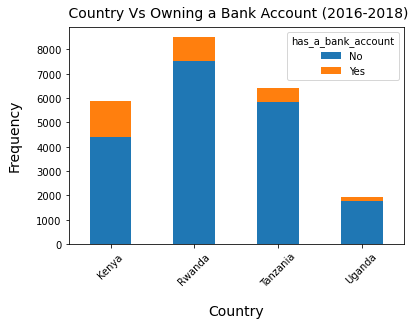

In [145]:
# Checking how Country affects owning a Bank Account
finance.groupby('country')['has_a_bank_account'].value_counts().unstack(level=-1).plot(kind='bar', stacked='True')
# # Rotating our x axis ticks
labels = finance.groupby('country')['has_a_bank_account'].value_counts(normalize=True)
print(labels)
plt.xticks(rotation = 45)

# # Giving our chart a title
plt.title(" Country Vs Owning a Bank Account (2016-2018)", fontsize=14, y=1.015)

# # Labeling our y axis
plt.ylabel("Frequency", fontsize=14, labelpad=15)

# # Labeling our x axis
plt.xlabel("Country", fontsize=14, labelpad=15)

# # Displaying our chart
plt.show()

cell_phone_access  has_a_bank_account
No                 No                    0.983798
                   Yes                   0.016202
Yes                No                    0.815013
                   Yes                   0.184987
Name: has_a_bank_account, dtype: float64


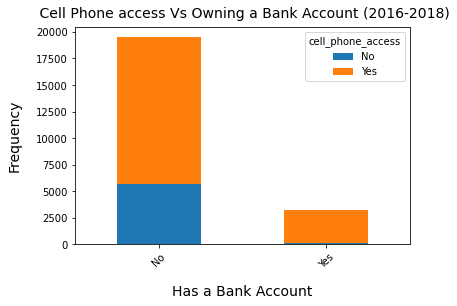

In [146]:
# Checking how cell phone access affects owning a Bank Account

finance.groupby('cell_phone_access')['has_a_bank_account'].value_counts().unstack(level=0).plot(kind='bar', stacked='True')
# # Rotating our x axis ticks
labels = finance.groupby('cell_phone_access')['has_a_bank_account'].value_counts(normalize=True)
print(labels)


plt.xticks(rotation = 45)

# # Giving our chart a title
plt.title(" Cell Phone access Vs Owning a Bank Account (2016-2018)", fontsize=14, y=1.015)

# # Labeling our y axis
plt.ylabel("Frequency", fontsize=14, labelpad=15)

# # Labeling our x axis
plt.xlabel("Has a Bank Account", fontsize=14, labelpad=15)

# # Displaying our chart
plt.show()


type_of_job                   has_a_bank_account
Dont Know/Refuse to answer    No                    0.881356
                              Yes                   0.118644
Farming and Fishing           No                    0.882931
                              Yes                   0.117069
Formally employed Government  Yes                   0.777487
                              No                    0.222513
Formally employed Private     Yes                   0.544928
                              No                    0.455072
Government Dependent          No                    0.803828
                              Yes                   0.196172
Informally employed           No                    0.920219
                              Yes                   0.079781
No Income                     No                    0.977778
                              Yes                   0.022222
Other Income                  No                    0.821637
                              Yes   

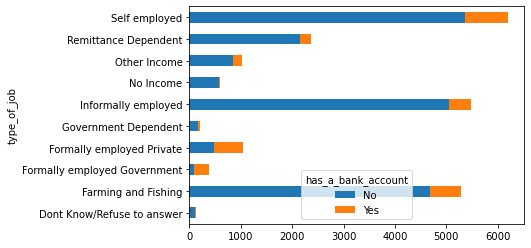

In [147]:
finance.groupby('type_of_job')['has_a_bank_account'].value_counts(ascending=False).unstack(level=-1).plot(kind='barh', stacked='True')
labels = finance.groupby('type_of_job')['has_a_bank_account'].value_counts(ascending=False, normalize=True)
print(labels)

### Hypothesis testing
> The hypothesis being tested is: Whether owning a bank account has any relation to how old you are.

In [148]:
#  The independent t-test is also called the two sample t-test, 
# student’s t-test, or unpaired t-test. It’s a parametric test that tests for a significant difference between the mean 
# of two independent (unrelated) groups.

# Null hypothesis (H0): u1 = u2, which translates to the mean of sample 1 is equal to the mean of sample 2
# Alternative hypothesis (HA): u1 ≠ u2, which translates to the mean of sample 1 is not equal to the mean of sample 2
# If the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.


# Step 1: 
# Showing descriptive statistics from pandas.describe()

finance.groupby("has_a_bank_account")['respondent_age'].describe()

,count,mean,std,min,25%,50%,75%,max
has_a_bank_account,,,,,,,,
No,19490.0,38.182966,16.088908,16.0,25.0,35.0,49.0,83.0
Yes,3235.0,39.342195,13.943035,16.0,29.0,36.0,47.5,83.0


In [149]:
rp.summary_cont(finance.groupby("has_a_bank_account")['respondent_age'])

,N,Mean,SD,SE,95% Conf.,Interval
has_a_bank_account,,,,,,
No,19490,38.1830,16.0889,0.1152,37.9571,38.4089
Yes,3235,39.3422,13.9430,0.2451,38.8615,39.8228


In [150]:
#  Levene’s test for homogeneity of variance. The method to conduct this test is stats.levene().

yes = finance[(finance['has_a_bank_account'] == 'Yes')]
no = finance[(finance['has_a_bank_account'] == 'No')]

stats.levene(yes['respondent_age'], no['respondent_age'])



LeveneResult(statistic=109.27612694400985, pvalue=1.6132170985238089e-25)

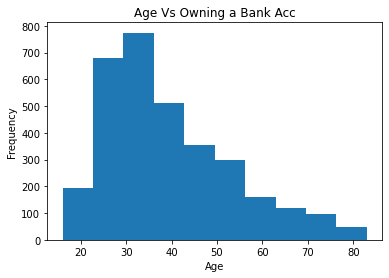

In [151]:
yes['respondent_age'].plot(kind="hist", title="Age Vs Owning a Bank Acc")
plt.xlabel('Age')
plt.savefig('Yes')

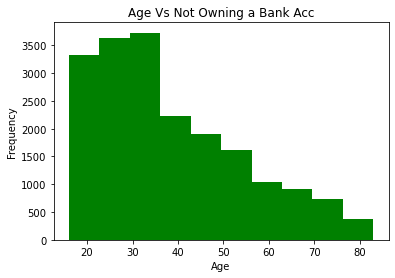

In [152]:
no['respondent_age'].plot(kind="hist", title= "Age Vs Not Owning a Bank Acc", color="green")
plt.xlabel("Age")
plt.savefig('No')

In [153]:
# From the looks of the histogram, each variable appears to be fairly normally distributed.

# The alternative hypothesis states that the independent variable did not affect the dependent variable, and the results are significant in terms of supporting the theory being investigated.statistical significance is often expressed as a p-value between 0 and 1. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. Hence age does not affect if one will own an account or not.

stats.ttest_ind(yes['respondent_age'], no['respondent_age'])

Ttest_indResult(statistic=3.8642715458242676, pvalue=0.00011173068281550309)

## Multi-ivariate Analysis with Python 

### a) Principal Component Analysis
>Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. 

In [154]:
# First we create dummmy Binary values.
#PCA
finance_test = finance.copy()
finance_test.head(3)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,level_of_education,type_of_job
0,Kenya,1970-01-01 00:00:00.000002018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,1970-01-01 00:00:00.000002018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,1970-01-01 00:00:00.000002018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed


In [155]:
# Step two: Converting gender_of_respondent column into binary
gender = {'Male': 1,'Female': 0}
finance_test['gender_of_respondent'] = finance_test['gender_of_respondent'].map(gender)

In [156]:
# Converting 	cell_phone_access column into binary
cell = {"Yes": 1, "No": 0}
finance_test["cell_phone_access"] = finance_test["cell_phone_access"].map(cell)

In [157]:
# Converting type_of_location column into binary
location = {"Rural": 1, "Urban": 0}
finance_test["type_of_location"] = finance_test["type_of_location"].map(location)

In [158]:
# Preview Our Columns

finance_test.columns


Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'marital_status', 'level_of_education',
       'type_of_job'],
      dtype='object')

In [159]:
# Dropping unecessary columns
finance_test.drop(["country", "year", "marital_status", 'level_of_education', 'type_of_job'],axis=1,inplace=True)

In [160]:
# Preview our test data
finance_test.head()


,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent
0,Yes,1,1,3.0,24.0,0
1,No,1,0,5.0,70.0,0
2,Yes,0,1,5.0,26.0,1
3,No,1,1,5.0,34.0,0
4,No,0,0,8.0,26.0,1


In [161]:
# Step One in PCA: Preprocessing
X = finance_test.drop('has_a_bank_account', 1)
y = finance_test['has_a_bank_account']

In [162]:

# Step Two:Splitting into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [163]:
# Step Three:Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [164]:
# Step Four: Applying PCA
# It is only a matter of three lines of code to perform PCA using Python's Scikit-Learn library. 
# The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# 

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



In [165]:
# Step Five: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 

explained_variance

array([0.27389809, 0.21482065, 0.20694095, 0.16984814, 0.13449217])

In [166]:
# Step Six: Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=0.27)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [167]:
# Step Seven: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [168]:
# Step Eight: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 28 out of 30 instances, 

[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


In [169]:
# Step Nine: Results with 2 Principal Components
# Now let's try to evaluate classification performance of the random forest algorithm 
# with 2 principal components. 
#
from sklearn.decomposition import PCA

pca = PCA(n_components=0.48)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [170]:
# Step Ten: Results with 2 Principal Components
# Lets now write code to evaluate clasification performance of the 
# random forest algorithm with 3 principal components.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [171]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))
# Principle component achieves an accuracy of 85%

[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


### From the above experimentation we achieved optimal level of accuracy while significantly reducing the number of features in the dataset. We saw that accuracy achieved with only 1 principal component is equal to the accuracy achieved with 2 pca components.The number of principal components to retain in a feature set depends on several conditions such as storage capacity, training time, performance, etc. In some dataset all the features are contributing equally to the overall variance, therefore all the principal components are crucial to the predictions and none can be ignored. A general rule of thumb is to take number of principal of principal components that contribute to significant variance and ignore those with diminishing variance returns. 

### Challeging the solution
>### **Linear Discriminant Analysis (LDA)** is a simple and powerful linear transformation that is most commonly used as dimensionality reduction technique in the pre-processing step for machine learning applications. The goal of linear discriminant analysis is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting ("curse of dimensionality") and also reduce computational costs.


In [172]:
finance_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   has_a_bank_account    22725 non-null  category
 1   type_of_location      22725 non-null  category
 2   cell_phone_access     22725 non-null  int64   
 3   household_size        22725 non-null  float64 
 4   respondent_age        22725 non-null  float64 
 5   gender_of_respondent  22725 non-null  category
dtypes: category(3), float64(2), int64(1)
memory usage: 777.0 KB


In [173]:
# Step 1: Once dataset is loaded into a pandas data frame object, the first step is to divide dataset 
# into features and corresponding labels and then divide the resultant dataset into training and test sets. 
# The following code divides data into labels and feature set. 
# The code assigns the first five columns of the dataset i.e. the feature set to X variable 
# while the values in the first column (labels) are assigned to the y variable.
#
X = finance_test.iloc[:, 1:6].values
y = finance_test.iloc[:, 0].values

In [174]:
# Step 2: The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [175]:
# Step 3: Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [176]:
# Step 4: Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [177]:
# Step 5: Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [178]:
# Step 6: Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
# We can see that the algorithm achieved an accuracy of 85%, similar to the PCA analysis.

[[3896    0]
 [ 649    0]]
Accuracy0.8572057205720572


##  Follow up questions
> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

### a). Did we have the right data?
> Yes.

### b). Do we need other data to answer our question?
> Our data was quite right but if there was a way we could collect more data on the same it would be better.

### c). Did we have the right question?
> Yes

## Conclusions and Recomendations.

> ### From our exploratory data analysis and statistical analysis techniques we have made some observations therefore we can draw some conclusions. 
### * About 14% of the people in Kenya, Uganda, Tanzania and Rwanda owned an account or had access to one in the three year period.
### * 19% males have a bank account compared to 11% in females, that would be as a result of some factors.
### * In rural area set up not many own a bank account the percentage stands at 11% unlike urban areas whereby 18% have access to an account.
### * Kenya is leading in numbers of persons who have a bank account, followed closely by Rwanda. In Tanzania and Uganda the numbers are too low.
### * Cell phones affect ownership of accounts since most people who own a phone do not have a bank account. This would be explained by the developing trend of mobile money. 81% have phones but no bank account compared to 18% who own a phone and an account respectively.
### * Age does not affect whether you ownn an account, however the average age of the participants of the survey is 38. 
### * Persons who are Formerly employed both private and Goverment have a high chance of owning a bank account, followed closely by Self employed persons.

>### Recomendations
### * Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions. Banks should devise ways to incorporate efficient and suitable mobile banking solutions. That would increase frequency of persons opting to have an account.
### * Tanzania and Uganda should create more awareness on benefits of having a bank account.



